Amazon (AMZN) Financial Analysis - Using Real Yahoo Finance Data
------------------------------------------------------------
Fetching Amazon (AMZN) data from Yahoo Finance...
✓ Successfully fetched Amazon financial data

AMAZON (AMZN) REAL-TIME FINANCIAL ANALYSIS
Current Stock Price: $228.15
Market Cap: $2,433,196,752,896
Shares Outstanding: 10,664,899,584
Trailing P/E Ratio: 34.73
Forward P/E Ratio: 37.10
----------------------------------------------------------------------
Annual Revenue (TTM): $638.0B
Net Income (TTM): $59.2B
Net Profit Margin: 9.29%
----------------------------------------------------------------------
Most Recent Quarter (2025-06-30 00:00:00): $167.7B
Previous Quarter (2025-03-31 00:00:00): $155.7B
Quarter-over-Quarter Change: +7.7%

Found 5 quarters of revenue data

Generating quarterly revenue chart...
Quarter labels: ['2024-Q2', '2024-Q3', '2024-Q4', '2025-Q1', '2025-Q2']


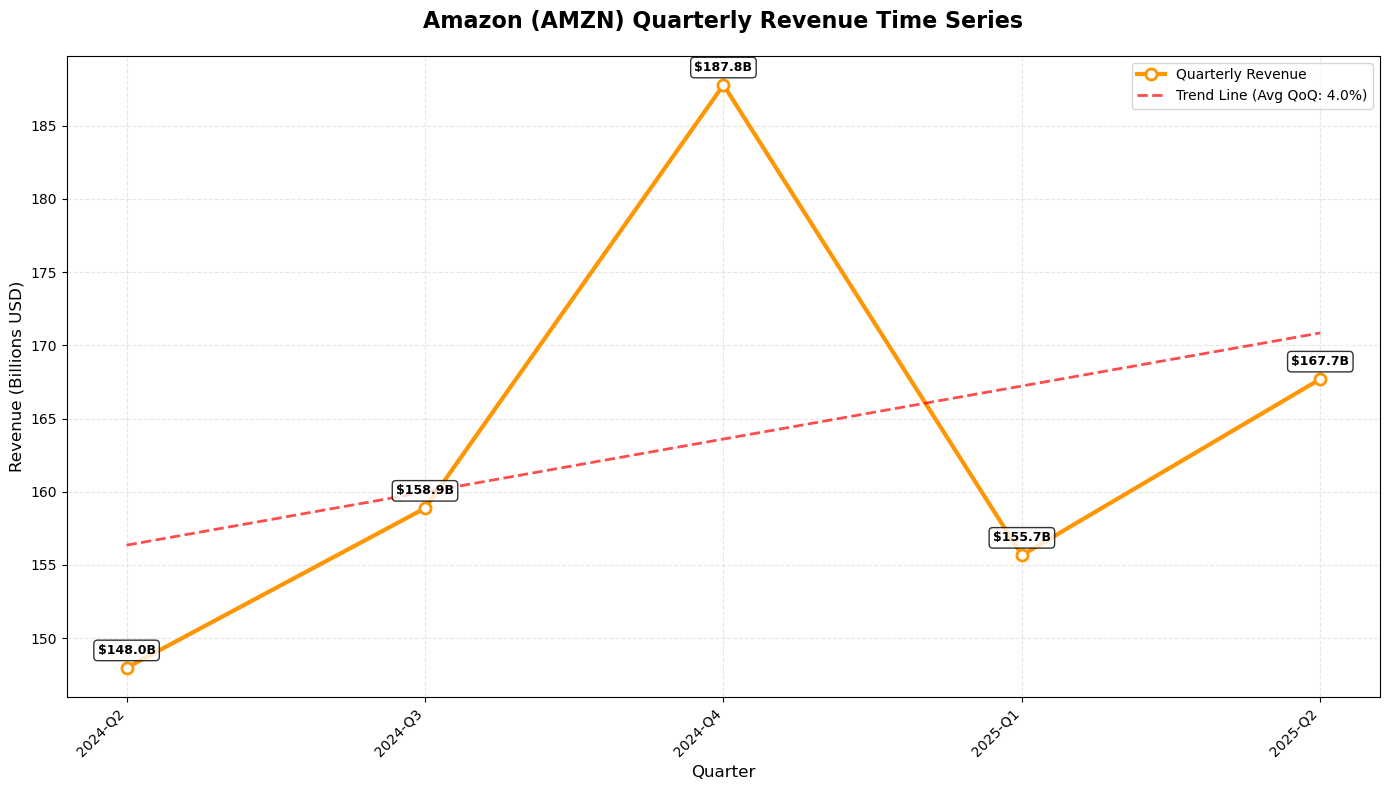


Quarter-over-Quarter Growth Analysis:
2024-09-30 00:00:00: +7.4%
2024-12-31 00:00:00: +18.2%
2025-03-31 00:00:00: -17.1%
2025-06-30 00:00:00: +7.7%


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def get_amazon_data():
    """
    Fetch real Amazon financial data from Yahoo Finance using yfinance
    """
    print("Fetching Amazon (AMZN) data from Yahoo Finance...")
    
    # Create ticker object
    amzn = yf.Ticker("AMZN")
    
    # Get various data
    data = {}
    
    try:
        # Get current stock info
        info = amzn.info
        data['current_price'] = info.get('currentPrice', info.get('regularMarketPrice', 0))
        data['market_cap'] = info.get('marketCap', 0)
        data['shares_outstanding'] = info.get('sharesOutstanding', 0)
        data['trailing_pe'] = info.get('trailingPE', 0)
        data['forward_pe'] = info.get('forwardPE', 0)
        
        # Get quarterly financials
        quarterly_financials = amzn.quarterly_financials
        data['quarterly_financials'] = quarterly_financials
        
        # Get annual financials
        annual_financials = amzn.financials
        data['annual_financials'] = annual_financials
        
        # Get quarterly income statement (more detailed)
        quarterly_income_stmt = amzn.quarterly_income_stmt
        data['quarterly_income'] = quarterly_income_stmt
        
        # Get annual income statement
        annual_income_stmt = amzn.income_stmt
        data['annual_income'] = annual_income_stmt
        
        print("✓ Successfully fetched Amazon financial data")
        return data
        
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def extract_quarterly_revenue(quarterly_income):
    """
    Extract quarterly revenue from the fetched data
    """
    try:
            # Get Total Revenue row
            if 'Total Revenue' in quarterly_income.index:
                revenue_row = quarterly_income.loc['Total Revenue']
            elif 'Total revenue' in quarterly_income.index:
                revenue_row = quarterly_income.loc['Total revenue']
            else:
                # Try to find revenue in different possible names
                revenue_indices = [idx for idx in quarterly_income.index if 'revenue' in idx.lower()]
                if revenue_indices:
                    revenue_row = quarterly_income.loc[revenue_indices[0]]
                else:
                    return None
            
            # Convert to billions and create dictionary with actual dates
            revenue_data = {}
            for date, value in revenue_row.items():
                if pd.notna(value):
                    # Keep the actual datetime object - don't convert to string
                    revenue_data[date] = value / 1e9  # Convert to billions
            
            # Sort by date (chronological order)
            sorted_revenue = dict(sorted(revenue_data.items(), key=lambda x: x[0]))
            
            # Get last 12 quarters
            recent_12 = dict(list(sorted_revenue.items())[-12:])
            return recent_12
    except Exception as e:
        print(f"Error extracting quarterly revenue: {e}")
        return None

def plot_quarterly_revenue(quarterly_data):
    """
    Plot quarterly revenue changes as a time series
    """
    if not quarterly_data:
        print("No quarterly revenue data available for plotting")
        return None
    
    # Extract dates and revenues
    dates = list(quarterly_data.keys())
    revenues = list(quarterly_data.values())
    
    # Sort by date to ensure chronological order
    combined = list(zip(dates, revenues))
    combined.sort(key=lambda x: x[0])
    dates, revenues = zip(*combined)
    
    # Convert to lists for easier handling
    dates = list(dates)
    revenues = list(revenues)
    
    # Create quarter labels by fixing malformed quarter strings
    quarter_labels = []
    for date_obj in dates:
        try:
            # Handle datetime objects properly
            if hasattr(date_obj, 'year') and hasattr(date_obj, 'month'):
                year = date_obj.year
                month = date_obj.month
                # Calculate quarter from month
                quarter = (month - 1) // 3 + 1
                quarter_labels.append(f"{year}-Q{quarter}")
            else:
                # Fallback: try to parse as string
                date_str = str(date_obj)
                parts = date_str.split('-Q')
                if len(parts) == 2:
                    year = int(parts[0])
                    quarter_raw = parts[1]
                    
                    # Fix malformed quarters
                    if quarter_raw == '30':
                        quarter = 3
                    elif quarter_raw == '31':
                        quarter = 4
                    else:
                        quarter = int(quarter_raw)
                        if quarter > 4:
                            quarter = ((quarter - 1) % 4) + 1
                    
                    quarter_labels.append(f"{year}-Q{quarter}")
                else:
                    quarter_labels.append(str(date_obj)[:10])  # Just date part, no time
                
        except Exception as e:
            print(f"Error parsing {date_obj}: {e}")
            quarter_labels.append(str(date_obj)[:10])  # Just date part, no time
    
    print(f"Quarter labels: {quarter_labels}")
    
    # Create plot
    plt.figure(figsize=(14, 8))
    
    # Use simple range for x-axis positions
    x_pos = range(len(revenues))
    
    # Plot line
    plt.plot(x_pos, revenues, marker='o', linewidth=3, markersize=8, 
             color='#ff9500', markerfacecolor='white', markeredgecolor='#ff9500', 
             markeredgewidth=2, label='Quarterly Revenue')
    
    # Add value labels
    for i, revenue in enumerate(revenues):
        plt.annotate(f'${revenue:.1f}B', (i, revenue), 
                     textcoords="offset points", xytext=(0,10), ha='center',
                     fontsize=9, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # Format plot
    plt.title('Amazon (AMZN) Quarterly Revenue Time Series', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Quarter', fontsize=12)
    plt.ylabel('Revenue (Billions USD)', fontsize=12)
    
    # Set x-axis labels
    plt.xticks(x_pos, quarter_labels, rotation=45, ha='right')
    
    # Add grid and legend
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend()
    
    # Calculate and add trend line
    qoq_growth = []
    for i in range(1, len(revenues)):
        growth = ((revenues[i] - revenues[i-1]) / revenues[i-1]) * 100
        qoq_growth.append(growth)
    
    if qoq_growth:
        avg_qoq_growth = np.mean(qoq_growth)
        z = np.polyfit(x_pos, revenues, 1)
        p = np.poly1d(z)
        plt.plot(x_pos, p(x_pos), "--", alpha=0.7, color='red', 
                 linewidth=2, label=f'Trend Line (Avg QoQ: {avg_qoq_growth:.1f}%)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    return qoq_growth

def calculate_net_profit_margin(annual_income):
    """
    Calculate net profit margin from real data
    """
    try:
        if annual_income is not None and not annual_income.empty:
            # Get most recent year data
            latest_year = annual_income.columns[0]
            
            # Find total revenue
            revenue_keys = [key for key in annual_income.index if 'total revenue' in key.lower()]
            if revenue_keys:
                total_revenue = annual_income.loc[revenue_keys[0], latest_year]
            else:
                print("Could not find total revenue in annual data")
                return None
            
            # Find net income
            net_income_keys = [key for key in annual_income.index if 'net income' in key.lower()]
            if net_income_keys:
                net_income = annual_income.loc[net_income_keys[0], latest_year]
            else:
                print("Could not find net income in annual data")
                return None
            
            if pd.notna(total_revenue) and pd.notna(net_income) and total_revenue != 0:
                net_profit_margin = (net_income / total_revenue) * 100
                return net_profit_margin, total_revenue, net_income
            
    except Exception as e:
        print(f"Error calculating net profit margin: {e}")
    
    return None

def display_financial_summary(data):
    """
    Display comprehensive financial summary with real data
    """
    print("\n" + "=" * 70)
    print("AMAZON (AMZN) REAL-TIME FINANCIAL ANALYSIS")
    print("=" * 70)
    
    # Basic info
    print(f"Current Stock Price: ${data['current_price']:.2f}")
    print(f"Market Cap: ${data['market_cap']:,.0f}")
    print(f"Shares Outstanding: {data['shares_outstanding']:,.0f}")
    
    if data['trailing_pe'] and data['trailing_pe'] > 0:
        print(f"Trailing P/E Ratio: {data['trailing_pe']:.2f}")
    if data['forward_pe'] and data['forward_pe'] > 0:
        print(f"Forward P/E Ratio: {data['forward_pe']:.2f}")
    
    print("-" * 70)
    
    # Calculate net profit margin
    margin_data = calculate_net_profit_margin(data['annual_income'])
    if margin_data:
        net_margin, total_revenue, net_income = margin_data
        print(f"Annual Revenue (TTM): ${total_revenue/1e9:.1f}B")
        print(f"Net Income (TTM): ${net_income/1e9:.1f}B")
        print(f"Net Profit Margin: {net_margin:.2f}%")
    else:
        print("Net profit margin calculation unavailable")
    
    print("-" * 70)
    
    # Quarterly revenue info
    quarterly_revenue = extract_quarterly_revenue(data['quarterly_income'])
    if quarterly_revenue:
        recent_quarters = list(quarterly_revenue.items())[-2:]  # Last 2 quarters
        if len(recent_quarters) >= 2:
            current_q, current_rev = recent_quarters[-1]
            previous_q, previous_rev = recent_quarters[-2]
            qoq_change = ((current_rev - previous_rev) / previous_rev) * 100
            
            print(f"Most Recent Quarter ({current_q}): ${current_rev:.1f}B")
            print(f"Previous Quarter ({previous_q}): ${previous_rev:.1f}B")
            print(f"Quarter-over-Quarter Change: {qoq_change:+.1f}%")
    
    print("=" * 70)

def main():
    """
    Main function to execute the real financial analysis
    """
    print("Amazon (AMZN) Financial Analysis - Using Real Yahoo Finance Data")
    print("-" * 60)
    
    # Get real data from Yahoo Finance
    data = get_amazon_data()
    
    if data:
        # Display comprehensive summary
        display_financial_summary(data)
        
        # Extract and plot quarterly revenue
        quarterly_revenue = extract_quarterly_revenue(data['quarterly_income'])
        
        if quarterly_revenue:
            print(f"\nFound {len(quarterly_revenue)} quarters of revenue data")
            print("\nGenerating quarterly revenue chart...")
            qoq_growth = plot_quarterly_revenue(quarterly_revenue)
            
            if qoq_growth:
                print(f"\nQuarter-over-Quarter Growth Analysis:")
                quarters = list(quarterly_revenue.keys())[1:]
                for quarter, growth in zip(quarters, qoq_growth):
                    print(f"{quarter}: {growth:+.1f}%")
        else:
            print("\nCould not extract quarterly revenue data")
        
    else:
        print("❌ Failed to fetch data from Yahoo Finance")
        print("Please check your internet connection and try again")
        print("You may also need to install yfinance: pip install yfinance")

if __name__ == "__main__":
    main()

# Required installation command:
# pip install yfinance pandas matplotlib numpy